<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/end_sem_cs575/A2_Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS575 End Sem Examination

###**Question 2** - Consider a time series stock values of various companies for a given duration (download using the script below). Your task is to find an appropriate model for the stock prediction. Compare at least with three different models including classical and Machine Learning Models. (submit your code and analysis)

**Name**- Vipin Gupta

**Roll**- 2011MT22 

#**For Facebook dataset**

#Downloading & Exporting the dataset

In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime

In [ ]:
#download data
fb = pdr.DataReader('FB', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

In [ ]:
#print first few lines of data
print(fb.head())

                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2014-08-01  73.220001  71.550003  72.220001  72.360001  43535000  72.360001
2014-08-04  73.879997  72.360001  72.360001  73.510002  30777000  73.510002
2014-08-05  73.589996  72.180000  73.199997  72.690002  34986000  72.690002
2014-08-06  73.720001  71.790001  72.019997  72.470001  30986000  72.470001
2014-08-07  74.000000  72.699997  73.000000  73.169998  38141000  73.169998


In [ ]:
#export and save as csv files
fb.to_csv('Facebook_stock.csv', sep=',')

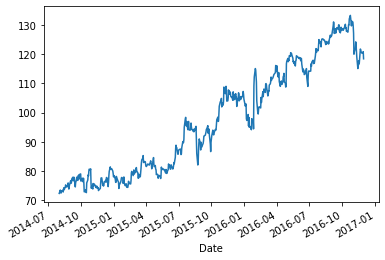

In [ ]:
#Visulaizing the close data
import matplotlib.pyplot as plt
fb["Close"].plot()

#Exponential smoothing model

In [ ]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
n = int(len(fb["Close"])*0.8)
data = fb['Close'].to_numpy()
train2 = data[:n]
test2 = data[n:]
date = (fb.index)

In [ ]:
Exp_model = ExponentialSmoothing(fb.Close,trend='mul',seasonal='mul',seasonal_periods=4)
fb['Pred_Exp'] = Exp_model.fit(smoothing_level = 0.9,smoothing_slope= 0.1,smoothing_seasonal = 0.2).fittedvalues.shift(0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'Prediction using Exponential Smoothing')

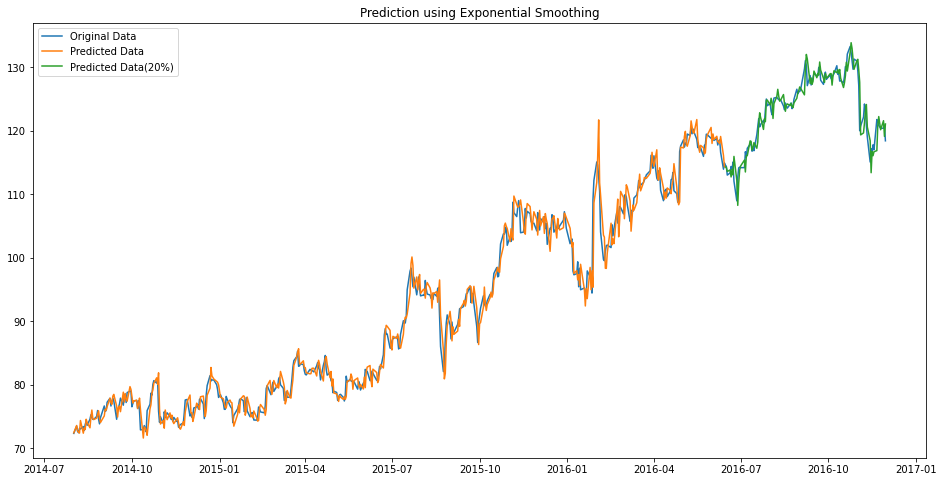

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(date,data, label='Original Data')
plt.plot(date[:n],fb.Pred_Exp[:n], label='Predicted Data')
plt.plot(date[n:],fb.Pred_Exp[n:], label='Predicted Data(20%)')
plt.legend()
plt.title('Prediction using Exponential Smoothing')

In [ ]:
#Calculation of MSE for comparing the model
rmse2 = (np.mean(np.power((np.array(test2)-np.array(fb.Pred_Exp[n:])),2)))
print('MSE value using Exponential Smoothing model: ',rmse2)

MSE value using Exponential Smoothing model:  3.126790071926512


#ARIMA (p, d, q) model

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing data
df = pd.read_csv('Facebook_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-01,73.220001,71.550003,72.220001,72.360001,43535000,72.360001
1,2014-08-04,73.879997,72.360001,72.360001,73.510002,30777000,73.510002
2,2014-08-05,73.589996,72.180000,73.199997,72.690002,34986000,72.690002
3,2014-08-06,73.720001,71.790001,72.019997,72.470001,30986000,72.470001
4,2014-08-07,74.000000,72.699997,73.000000,73.169998,38141000,73.169998


In [ ]:
# Extracting the required columns
df = df[['Date', 'Close']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    589 non-null    object 
 1   Close   589 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
# Changing the Date column to proper DateTime object
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    589 non-null    datetime64[ns]
 1   Close   589 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [ ]:
# Making Date column to be the index
df.columns=['Date','Closing price']
df.set_index('Date', inplace=True)
df.head()

,Closing price
Date,
2014-08-01,72.360001
2014-08-04,73.510002
2014-08-05,72.690002
2014-08-06,72.470001
2014-08-07,73.169998


Text(0.5, 0, 'Year')

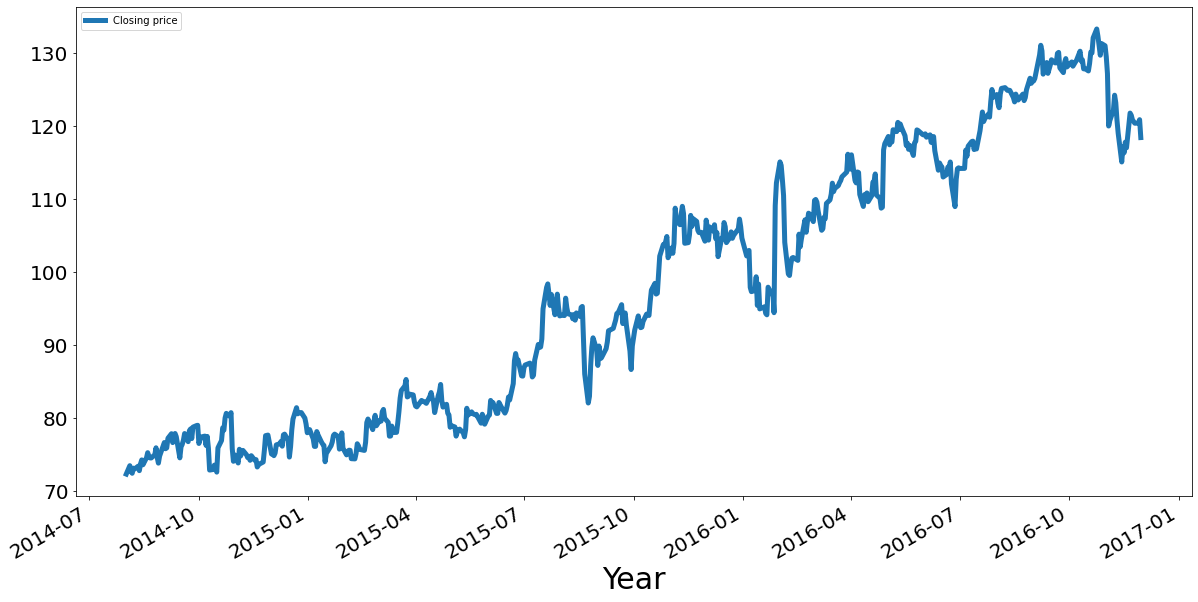

In [ ]:
# Plot
df.plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

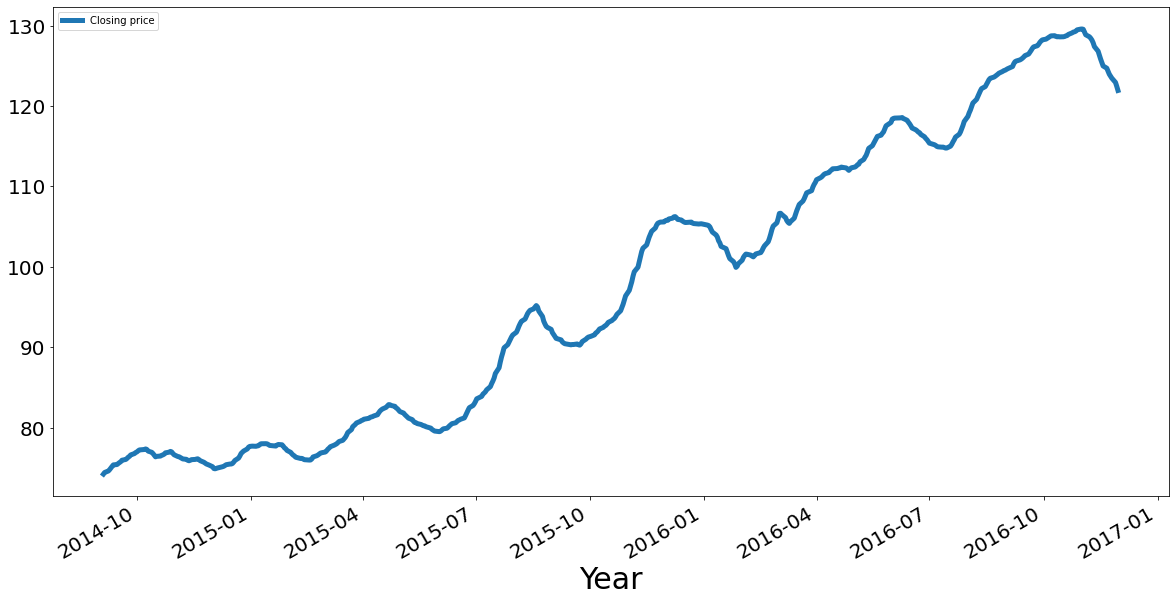

In [ ]:
# Seeing the trend more clearly
df.rolling(24).mean().plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)
# Overall a rise here

Text(0.5, 0, 'Year')

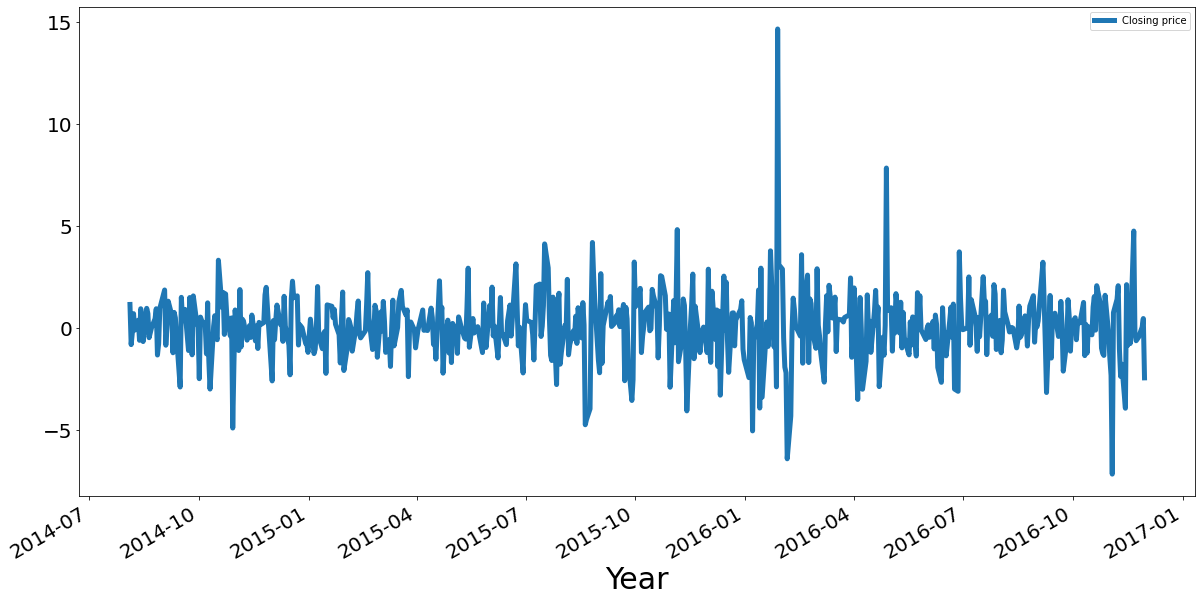

In [ ]:
# We can see that there is no specific seasonality here
# Removing trend
df.diff().plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

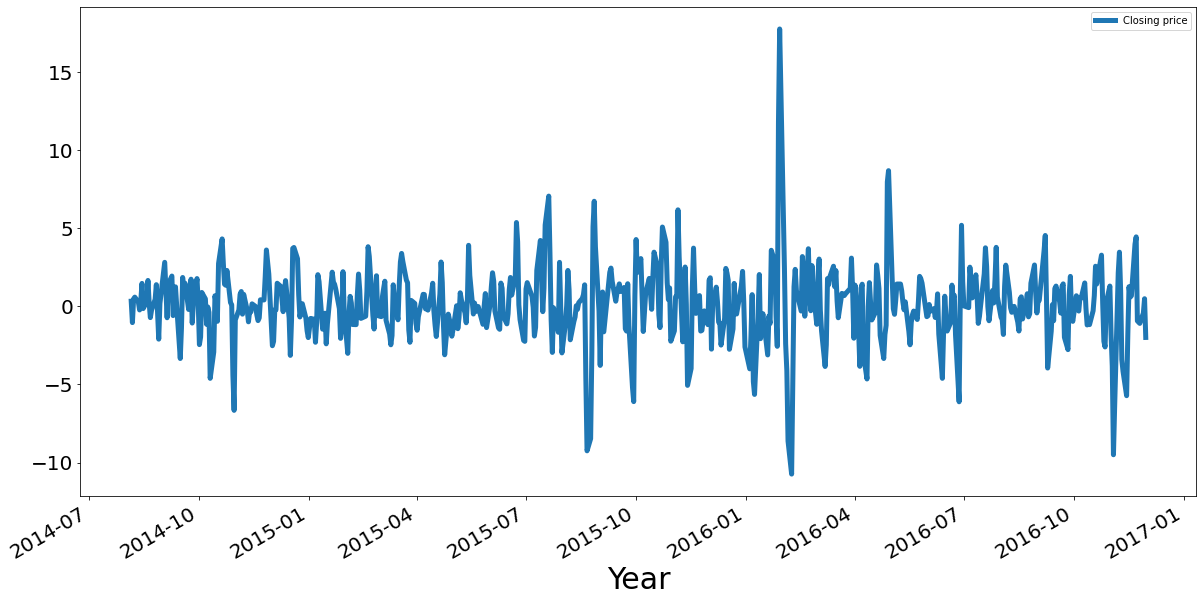

In [ ]:
# 2nd order differencing
df.diff(periods=2).plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

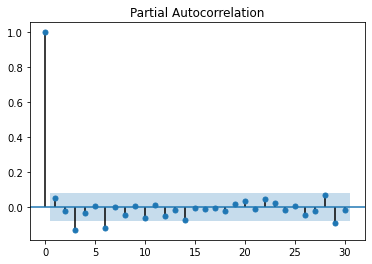

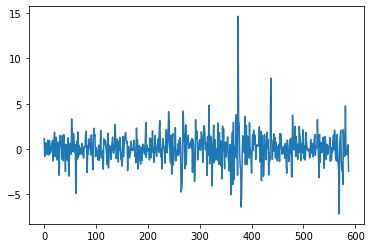

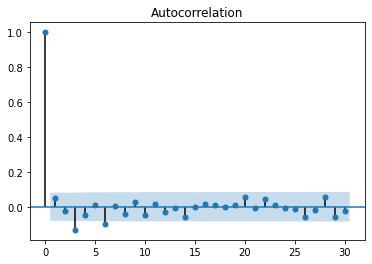

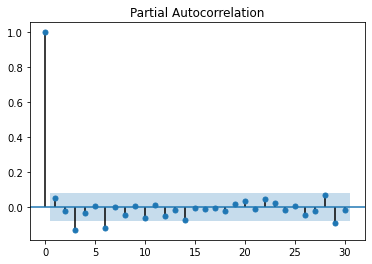

In [ ]:
# Let's take a look at its auto-corelation plots
# Before that we'll have to do manual differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def difference(data, lag):
    diff= []
    
    for i in range(lag, len(data)):
        value = data[i] - data[i-lag]
        diff.append(value)
    return pd.Series(diff)

df_close = df['Closing price']
X = df_close.values
diff = difference(X,1)
plt.plot(diff)
df_diff = pd.DataFrame(diff)
plot_acf(df_diff, lags=30)
plot_pacf(df_diff, lags=30)

In [ ]:
# Forecasting
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
df = df.astype(np.float64) 
Y = df.values
size = int(len(Y)*0.66)
train, test = Y[0:size], Y[size:len(Y)]


In [ ]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f'%(pred, obs))


predicted=101.685582, expected=105.199997
predicted=105.284636, expected=103.470001
predicted=103.549976, expected=104.570000
predicted=104.652589, expected=107.160004
predicted=107.249006, expected=105.459999
predicted=105.544438, expected=106.879997
predicted=106.967834, expected=108.070000
predicted=108.160634, expected=107.919998
predicted=108.010023, expected=106.919998
predicted=107.007271, expected=109.820000
predicted=109.914357, expected=109.949997
predicted=110.044444, expected=109.580002
predicted=109.673285, expected=108.389999
predicted=108.480074, expected=105.730003
predicted=105.813220, expected=105.930000
predicted=106.013508, expected=107.510002
predicted=107.597223, expected=107.320000
predicted=107.406534, expected=109.410004
predicted=109.501485, expected=109.889999
predicted=109.982438, expected=110.669998
predicted=110.764126, expected=112.180000
predicted=112.277598, expected=111.019997
predicted=111.114520, expected=111.449997
predicted=111.545338, expected=111

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=110.699789, expected=110.510002
predicted=110.599346, expected=110.839996
predicted=110.929903, expected=109.639999
predicted=109.726899, expected=110.449997
predicted=110.538578, expected=112.290001
predicted=112.382646, expected=112.419998
predicted=112.512730, expected=113.440002
predicted=113.534875, expected=110.559998
predicted=110.648016, expected=110.099998
predicted=110.186757, expected=108.760002
predicted=108.843488, expected=108.889999
predicted=108.973592, expected=116.730003
predicted=116.831305, expected=117.580002
predicted=117.683009, expected=118.570000
predicted=118.675022, expected=117.430000
predicted=117.532200, expected=118.059998
predicted=118.163391, expected=117.809998
predicted=117.912594, expected=119.489998
predicted=119.596147, expected=119.239998
predicted=119.345346, expected=120.500000
predicted=120.607937, expected=119.519997
predicted=119.625500, expected=120.279999
predicted=120.386963, expected=119.809998
predicted=119.915677, expected=118

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=124.042751, expected=124.309998
predicted=124.413278, expected=123.089996
predicted=123.190651, expected=122.510002
predicted=122.609309, expected=124.360001
predicted=124.462767, expected=125.150002
predicted=125.254124, expected=125.260002
predicted=125.364136, expected=125.059998
predicted=125.163534, expected=124.879997
predicted=124.982978, expected=124.900002
predicted=125.002820, expected=124.879997
predicted=124.982575, expected=123.900002
predicted=124.000469, expected=123.300003
predicted=123.399108, expected=124.370003
predicted=124.470993, expected=123.910004
predicted=124.009907, expected=123.559998
predicted=123.659030, expected=124.150002
predicted=124.249982, expected=124.370003
predicted=124.470215, expected=123.480003
predicted=123.578311, expected=123.889999
predicted=123.988905, expected=124.959999
predicted=125.060765, expected=126.540001
predicted=126.643596, expected=125.839996
predicted=125.942057, expected=126.120003
predicted=126.222403, expected=126

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


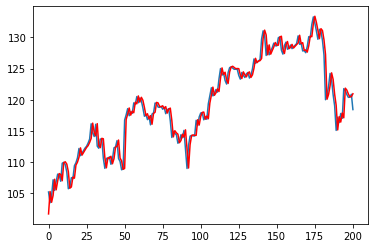

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#Calculation of MSE for comparing the model
difference_array = np.subtract(test, predictions)
squared_array = np.square(difference_array)
mse = squared_array.mean()
mse

2.4418359598771464

#LSTM model

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

importing the training data

In [ ]:
data = pd.read_csv('Facebook_stock.csv')


choosing the close column

In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') #turning the Close column to numeric
data = data.dropna() #romeving the NA values
trainData = data.iloc[:,4:5].values #selecting only the closing prices for training

scaling the values in the range of 0-1 for best preformances

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(589, 1)

preparing the data for LSTM

since its a time series problem we took 60 as timestep for our learning : given 60 closing values as an input data the 61st value is our output

In [ ]:
X_train = []
y_train = []

for i in range (60,589): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

ps : LSTM take a 3D tensor (seq_len,timestep,batch_size)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(529, 60, 1)

building the model

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)


Epoch 1/20
17/17 - 10s - loss: 0.0598
Epoch 2/20
17/17 - 3s - loss: 0.0086
Epoch 3/20
17/17 - 3s - loss: 0.0072
Epoch 4/20
17/17 - 3s - loss: 0.0065
Epoch 5/20
17/17 - 3s - loss: 0.0065
Epoch 6/20
17/17 - 3s - loss: 0.0067
Epoch 7/20
17/17 - 3s - loss: 0.0063
Epoch 8/20
17/17 - 3s - loss: 0.0068
Epoch 9/20
17/17 - 3s - loss: 0.0062
Epoch 10/20
17/17 - 3s - loss: 0.0055
Epoch 11/20
17/17 - 3s - loss: 0.0055
Epoch 12/20
17/17 - 3s - loss: 0.0058
Epoch 13/20
17/17 - 3s - loss: 0.0064
Epoch 14/20
17/17 - 3s - loss: 0.0063
Epoch 15/20
17/17 - 3s - loss: 0.0059
Epoch 16/20
17/17 - 3s - loss: 0.0049
Epoch 17/20
17/17 - 3s - loss: 0.0050
Epoch 18/20
17/17 - 3s - loss: 0.0064
Epoch 19/20
17/17 - 3s - loss: 0.0056
Epoch 20/20
17/17 - 3s - loss: 0.0052


ploting the training loss

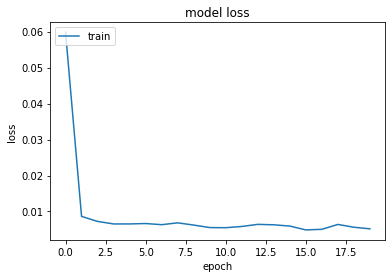

In [ ]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

testing the model on new data

In [ ]:
testData = pd.read_csv('Facebook_stock.csv') #importing the test data
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #turning the close column to numerical type
testData = testData.dropna() #droping the NA values
testData = testData.iloc[:,4:5] #selecting the closing prices for testing
y_test = testData.iloc[60:,0:].values #selecting the labels 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(529, 60, 1)

In [ ]:
y_pred = model.predict(X_test) #predicting the new values


In [ ]:
predicted_price = sc.inverse_transform(y_pred) #inversing the scaling transformation for ploting


ploting the results

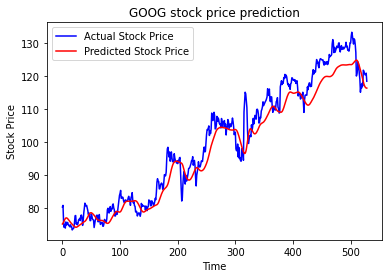

In [ ]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('GOOG stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#Calculation of MSE for comparing the model
difference_array = np.subtract(y_test, predicted_price)
squared_array = np.square(difference_array)
mse = squared_array.mean()
mse

20.561681311768684

#Result

MSE value for Exponential Model is 3.126790071926512

MSE value for ARIMA Model is 2.4418359598771464

MSE value for LSTM Model is 20.561681311768684

 As MSE value is minimum for ARIMA Model. So, for this dataset ARIMA (1, 0,1) model can be used.

Although this is still not a best model exist, there are many advance stock prediction models are available and also here we have considered only the previous stock data but analyzing the market and taking all the effect during the building of any stock prediction model will give the best results.